### Laboratory work 5: Fuzzy Numbers
The task of the lab is to develop the fuzzy operations:
* Division in the method __truediv__
* Summation in the method __add__

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial

In [53]:
def mu_max(val,width,x):
    buff = ((x-val)/width)*((x-val)/width)
    return max(0,1-buff)


class FuzzyValue():
    
    def __init__(self,val,width,mu = None):
        self.val = float(val)
        self.width = float(width)
        if mu is not None:
            self.mu = partial(mu,self.val,self.width)
        self.op = None
    

    def __call__(self,x):
        if self.mu is not None:
            return float(self.mu(x))


    def __truediv__(self, o):
        # Put your code here
        
        t = [self.val*pow(o.val, -1), self.val*pow(o.width, -1), self.width*pow(o.val, -1), self.width*pow(o.width, -1)]
        
        return max(t), min(t)
        #return FuzzyValue(self.val/o.val,self.width+o.width)

    def __add__(self, o): 
        # Put your code here
        self.op = o
        
        return self.val+o.val, self.width+o.width
    
    def draw(self):
        xs = np.linspace(-7,7,num=1000)
        y = [self(x) for x in xs]
        plt.figure()
        plt.plot(xs,y)        

a = FuzzyValue(5.1,1.5,mu_max)
b = FuzzyValue(4.3,2,mu_max)
# (a+b).draw()
print(b(3))
c=a+b


0.5775000000000001


In [55]:
print(a+b)
print(a/b)

(9.399999999999999, 3.5)
(2.55, 0.3488372093023256)


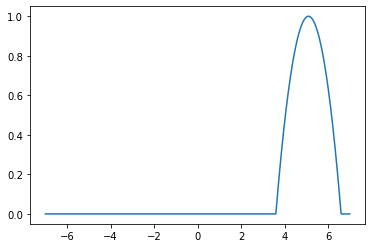

In [56]:
a.draw()

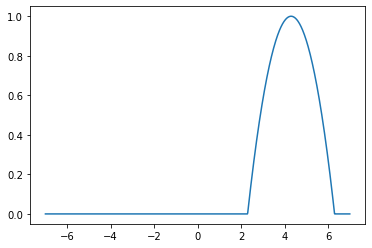

In [57]:
b.draw()

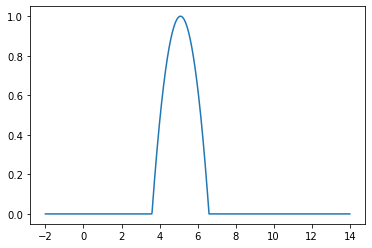

In [61]:
xs = np.linspace(-2,14,num=1000)
# a = FuzzyValue(0,3)
y = [a(x) for x in xs]
plt.plot(xs,y)

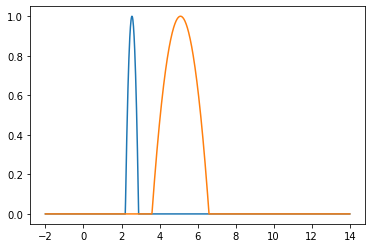

In [93]:
div = a/b
value_1 = FuzzyValue(division[0],div[1], mu_max)
res_1 = [value_1(x) for x in xs]
plt.plot(xs,res_1)
plt.plot(xs,y)

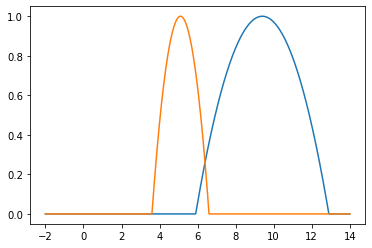

In [84]:
add = a+b
value_2 = FuzzyValue(add[0],add[1],mu_max)
res_2 = [value_2(x) for x in xs]
plt.plot(xs,res_2)
plt.plot(xs,y)